In [1]:
# In this ipynb we will analyse the data on Billionaires, try to get some useful insights, and depending on the 
# data, maybe even predict or forecast things.

In [2]:
# First thing's first
# importing the libraries

import os
os.environ['MPLCONFIGDIR'] = '/Users/yousuf/Desktop/AI/ML/Projects/Billionaires_analysis'

# The above code configures the environment variable 'MPLCONFIGDIR' to a re-writable directory
# This is needed because matplotlib creates a temporary cache and stores temporary data that can speed up its operations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Billionaires Statistics Dataset.csv')
data

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,6.705989e+07,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2540,1000,Healthcare,Yu Rong,51.0,China,Shanghai,Health clinics,Healthcare,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2636,2540,1000,Food & Beverage,"Richard Yuengling, Jr.",80.0,United States,Pottsville,Beer,Food & Beverage,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,3.282395e+08,37.090240,-95.712891
2637,2540,1000,Manufacturing,Zhang Gongyun,60.0,China,Gaomi,Tyre manufacturing machinery,Manufacturing,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397
2638,2540,1000,Real Estate,Zhang Guiping & family,71.0,China,Nanjing,Real estate,Real Estate,China,...,2.9,"$19,910,000,000,000",50.6,100.2,77.0,9.4,59.2,1.397715e+09,35.861660,104.195397


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   int64  
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

In [5]:
data.columns

Index(['rank', 'finalWorth', 'category', 'personName', 'age', 'country',
       'city', 'source', 'industries', 'countryOfCitizenship', 'organization',
       'selfMade', 'status', 'gender', 'birthDate', 'lastName', 'firstName',
       'title', 'date', 'state', 'residenceStateRegion', 'birthYear',
       'birthMonth', 'birthDay', 'cpi_country', 'cpi_change_country',
       'gdp_country', 'gross_tertiary_education_enrollment',
       'gross_primary_education_enrollment_country', 'life_expectancy_country',
       'tax_revenue_country_country', 'total_tax_rate_country',
       'population_country', 'latitude_country', 'longitude_country'],
      dtype='object')

## We will be answering following questions that would provide us with valuable insights.

### 1. Highest Networth Individual, How much wealth do these billionaires hold altogether and how many of the top few hold half of that.
       i. youngest billionaire
      ii. oldest billionaire
     iii. most recently made billionaire
### 2. Which categories/industry have produced the highest amounts of billionaires.
       i. How many of the top billionaires have as much wealth as the other remaining billionaires
### 3. Which country/city has produced the highest amounts of billionaires.

### 4. Check what age group has the most amount of billionaires 17-25, 25-40, 40-60, 60-75, 75+

### 5. How many of these billionaires are self-made and how many have inherited it

### 1. Highest Networth Individual, How much wealth do these billionaires hold altogether and how many of the top few hold half of that.

In [6]:
#CONVERTING 'finalWorth' into Billion

data['finalWorth'] = data['finalWorth'].astype(float)
data['finalWorth'] = data['finalWorth']/1000

data_highest_networth = data.sort_values(by='finalWorth',ascending=False)
#data_highest_networth.head(1)
#print("The individual with the highest networth is "+str(data_highest_networth.head(1)['personName'])+"with a networth of" + str(data_highest_networth.head(1)['finalWorth']))

highest_networth_person = data_highest_networth.iloc[0]['personName']
highest_networth_value = data_highest_networth.iloc[0]['finalWorth']

print("The individual with the highest net worth is " + str(highest_networth_person) + " with a net worth of " + str(highest_networth_value)+"B $")

The individual with the highest net worth is Bernard Arnault & family with a net worth of 211.0B $


### i.  youngest billionaire

In [7]:
youngest_billionaire = data.sort_values('age').head(1)[['personName','category','finalWorth']]
#this return a dataframe object

# now there are two ways to access the values of the name of the youngest billionaire and his wealth without hardcoding it 
# first  way is using .iloc(), it can be used for both series and dataframe.

youngest_billionaire_name  =     youngest_billionaire['personName'].iloc[0]
youngest_billionaire_worth = str(youngest_billionaire['finalWorth'].iloc[0])

print('The youngest billionaire is '+youngest_billionaire_name+ 'with a networth of '+youngest_billionaire_worth+'B $')

# second way is using .to_string(index=False)
# let's use the second way for the next problem

The youngest billionaire is Clemente Del Vecchiowith a networth of 3.5B $


### ii. oldest billionaire

In [8]:
oldest_billionaire = data.sort_values('age',ascending = False).head(1)
# let's print this using the second method i.e, .to_string(index=False)
# oldest_billionaire['personName']    gives a series    containing the index and the personName.
# oldest_billionaire[['personName']] gives a dataframe containing the index and the personName.

oldest_billionaire_name  = oldest_billionaire['personName'].to_string(index=False)
oldest_billionaire_worth = oldest_billionaire['finalWorth'].to_string(index=False)

print('The oldest billionaire is '+oldest_billionaire_name+ ' with a networth of '+oldest_billionaire_worth+'B $')

The oldest billionaire is George Joseph with a networth of 1.3B $


In [9]:
# The following datatypes are returned relative to the syntax, so keep that in mind as you might confuse one with other
# youngest_billionaire = data.sort_values('age')[['personName','category','finalWorth']]
# type(youngest_billionaire [['category']]) -> dataframe
# type(youngest_billionaire ['category']) -> series

<Axes: xlabel='age', ylabel='finalWorth'>

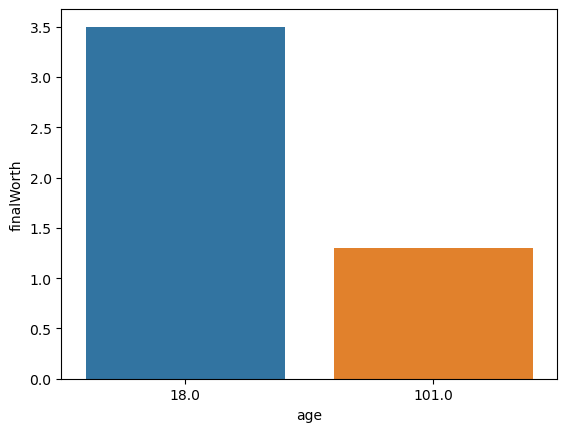

In [10]:
# ovy variable is short for old_vs_young it can replaced with that as per requirement

ovy = data[(data['age'] == data['age'].max())|(data['age'] == data['age'].min())]
sns.barplot(x=ovy.age, y=ovy.finalWorth)
# sns.barplot(x='age', y='finalWorth', hue='age', data=ovy)
# commented line makes the space upto scale on the x-axis

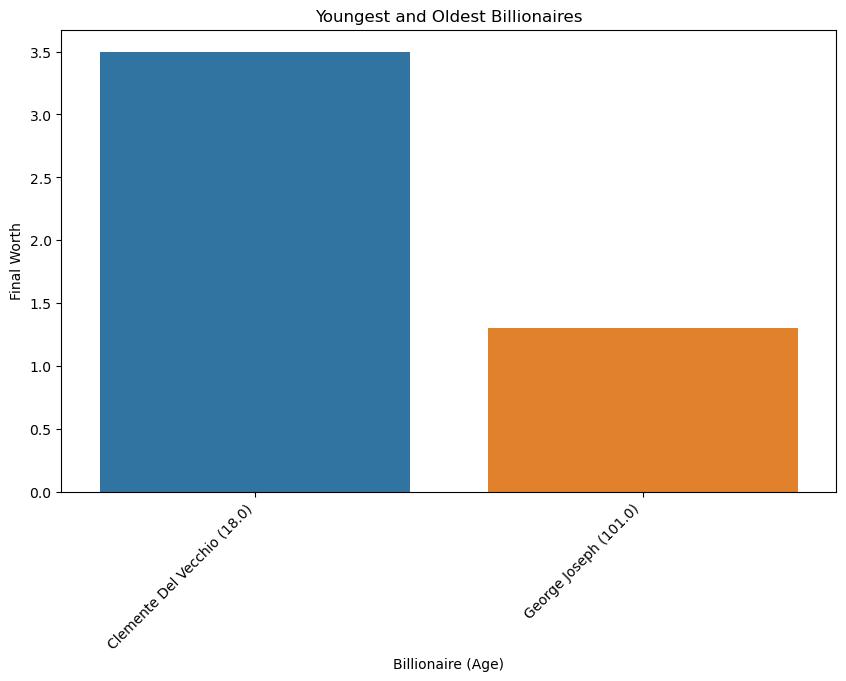

In [11]:


# Select the youngest and oldest billionaires
ovy = data[(data['age'] == data['age'].max()) | (data['age'] == data['age'].min())]

# Create labels by concatenating name and age
ovy_labels = ovy['personName'] + ' (' + ovy['age'].astype(str) + ')'

# Plotting a bar plot with error bars
plt.figure(figsize=(10, 6))
sns.barplot(x=ovy_labels, y='finalWorth', data=ovy, errorbar=None)
plt.xlabel('Billionaire (Age)')
plt.ylabel('Final Worth')
plt.title('Youngest and Oldest Billionaires')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

### iii. most recently made billionaire

In [12]:
# Assuming "Date" is the name of your date column
x = data[['date']]
x

,date
0,4/4/2023 5:01
1,4/4/2023 5:01
2,4/4/2023 5:01
3,4/4/2023 5:01
4,4/4/2023 5:01
...,...
2635,4/4/2023 5:01
2636,4/4/2023 5:01
2637,4/4/2023 5:01
2638,4/4/2023 5:01


In [13]:
# This 'date' column in this dataset represents when the data on the person was collected, NOT when he/she 
# became a billionaire
# so with the provided data, it is not possible to find out the most recently made billionaire

### 2. Which categories/industry have produced the highest amounts of billionaires.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2640 entries, 0 to 2639
Data columns (total 35 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rank                                        2640 non-null   int64  
 1   finalWorth                                  2640 non-null   float64
 2   category                                    2640 non-null   object 
 3   personName                                  2640 non-null   object 
 4   age                                         2575 non-null   float64
 5   country                                     2602 non-null   object 
 6   city                                        2568 non-null   object 
 7   source                                      2640 non-null   object 
 8   industries                                  2640 non-null   object 
 9   countryOfCitizenship                        2640 non-null   object 
 10  organization

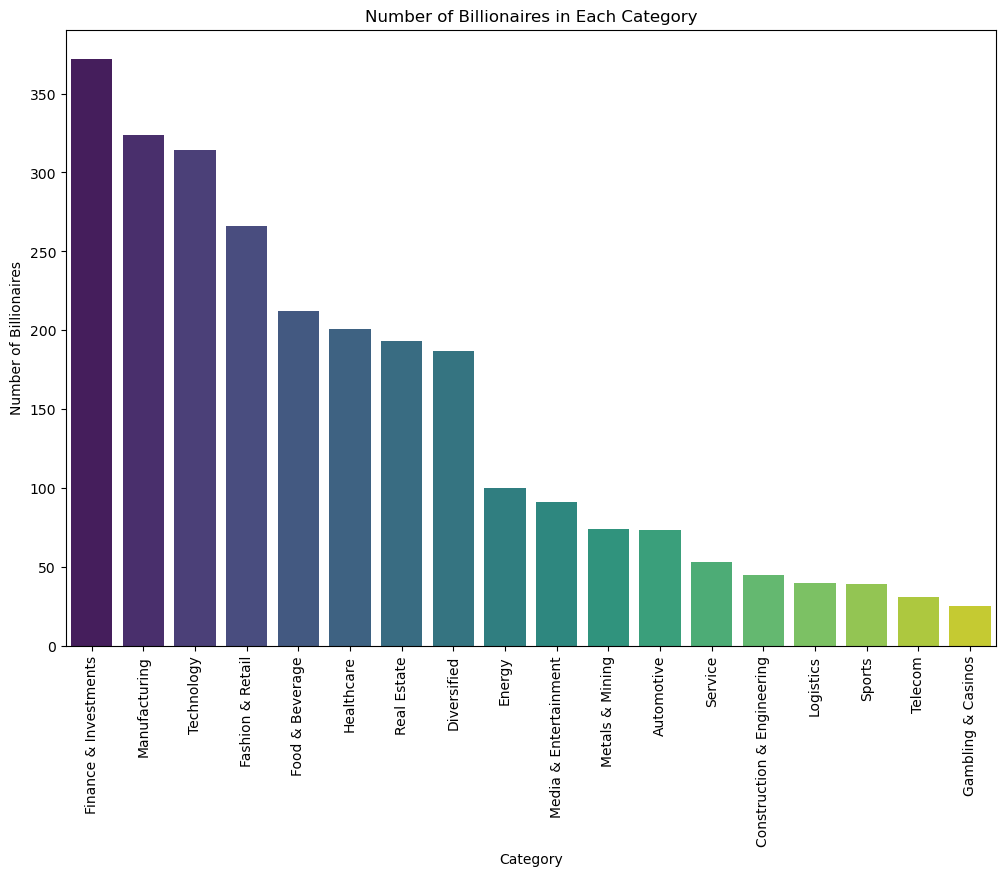

In [15]:
# Count the number of billionaires in each category
category_counts = data['category'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
# plt.bar(category_counts.index, category_counts.values, color='purple') another way of plotting the graph

# Adding labels and title
plt.xlabel('Category')
plt.ylabel('Number of Billionaires')
plt.title('Number of Billionaires in Each Category')
plt.xticks(rotation='vertical')
plt.show()


#### i. How many of the top billionaires have as much wealth as the other remaining billionaires

#### .cumsum() function calculates the cumulative-sum(cum-sum) of the finalWorth column in the following code
#### a simple example of how this works is as follow
#### let's say we have a datafram with column A -

####          A
#### 0  1
#### 1  2
#### 2  3
#### 3  4

now if we call the cumsum function on column A we get,

####          A
#### 0  1
#### 1  3
#### 2  6
#### 3  10

it would be the sum of the values in that column upto that value

In [16]:
# Assuming 'finalWorth' is the column representing final wealth
sorted_data = data.sort_values('finalWorth', ascending=False)

# Calculate cumulative sum
sorted_data['cumulative_sum'] = sorted_data['finalWorth'].cumsum()

# Find the index where cumulative sum is greater than or equal to half of total sum
half_total_sum_index = (sorted_data['cumulative_sum'] >= (sorted_data['finalWorth'].sum() / 2)).idxmax()

# Number of billionaires up to the half_total_sum_index
top_few_count = half_total_sum_index + 1

# Number of remaining billionaires
remaining_count = len(sorted_data) - top_few_count

print(f"The top {top_few_count} billionaires, have amongst them as much wealth as the remaining {remaining_count} billionaires")

The top 300 billionaires, have amongst them as much wealth as the remaining 2340 billionaires


### 3.  Which country/city has produced the highest amounts of billionaires.

                          count
country                        
Algeria                       1
Uruguay                       1
Turks and Caicos Islands      1
Tanzania                      1
Portugal                      1
...                         ...
United Kingdom               82
Germany                     102
India                       157
China                       523
United States               754

[78 rows x 1 columns]


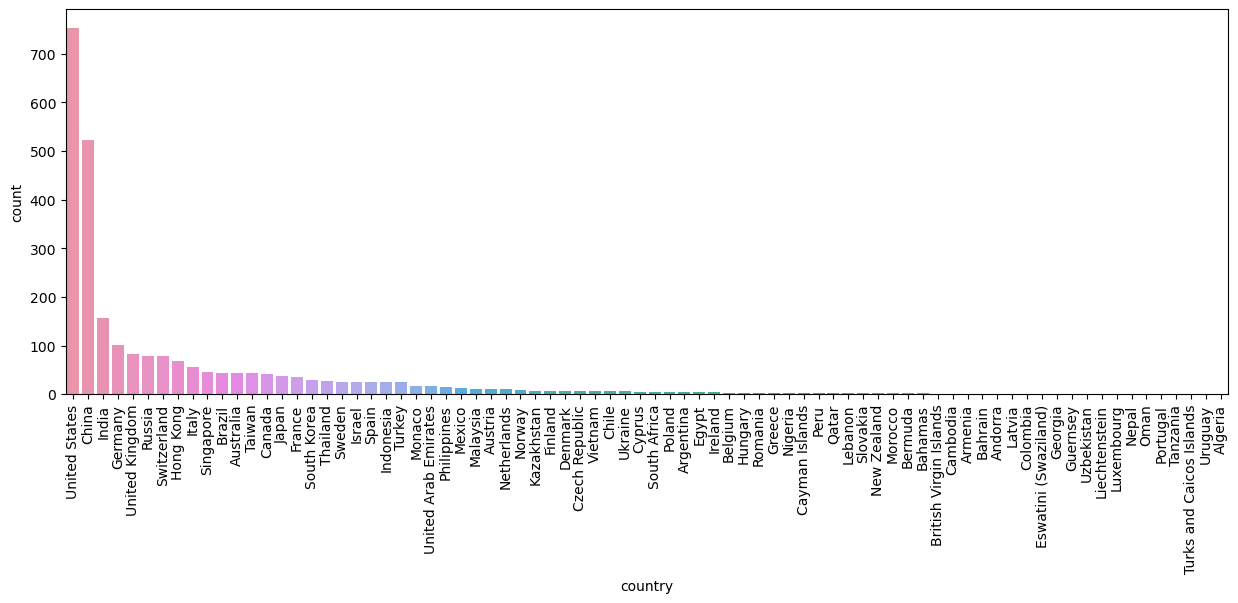

In [17]:
country_analysis = data.groupby('country').size()
new_df = pd.DataFrame(country_analysis)
# the above code converted it into a dataframe with one column and the heading of that column was integer 0 not string 0 
# that cause trouble and took time to figure that out 

new_df = new_df.rename(columns={0: 'count'})
new_df = new_df.sort_values('count')
print(new_df)
#plotting a bar graph

plt.figure(figsize=(15,5))
sns.barplot(x=new_df.index,y=new_df['count'])
plt.xticks(rotation='vertical')
plt.gca().invert_xaxis()

                count
country              
United States     754
China             523
India             157
Germany           102
United Kingdom     82
Russia             79
Switzerland        78
Hong Kong          68
Italy              55
Singapore          46


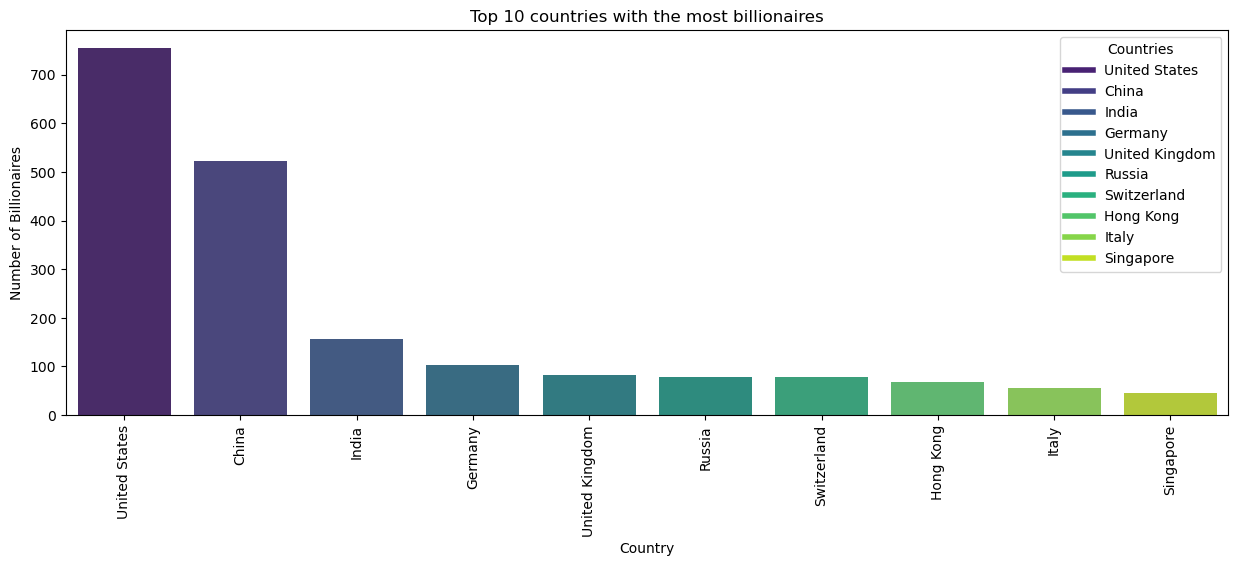

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

country_analysis = data.groupby('country').size()
new_df = pd.DataFrame(country_analysis)
new_df = new_df.rename(columns={0: 'count'})
new_df = new_df.sort_values('count', ascending=False).astype(int)

# Print the DataFrame
new_df = new_df.head(10)
print(new_df)

# Plotting a bar graph with legend
plt.figure(figsize=(15, 5))
colors = sns.color_palette('viridis', len(new_df))  # You can use any other palette or specify colors

bars = sns.barplot(x=new_df.index, y=new_df['count'], palette=colors)
plt.xticks(rotation='vertical')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Number of Billionaires')
plt.title('Top 10 countries with the most billionaires')

# Adding legend
legend_labels = [plt.Line2D([0], [0], color=colors[i], lw=4, label=new_df.index[i]) for i in range(len(new_df))]
plt.legend(handles=legend_labels, title='Countries')

plt.show()


### 4. Check what age group has the most amount of billionaires Y-young, M-middle-aged, O-old, E-elderly
    Y - 17-30
    M - 31-50 
    O - 51-70 
    E - 70+

In [20]:
#data['ageGroup'] = ''  # Create an empty column

#for i in range(len(data)):
#    if 17 <= data['age'].iloc[i] <= 30:
#        data.loc[i, 'ageGroup'] = 'Y'
#    elif 31 <= data['age'].iloc[i] <= 50:
#        data.loc[i, 'ageGroup'] = 'M'
#    elif 51 <= data['age'].iloc[i] < 70:
#        data.loc[i, 'ageGroup'] = 'O'
#    elif data['age'].iloc[i] >= 71:
#        data.loc[i, 'ageGroup'] = 'E'

# Print the resulting ageGroup column
#print(data['ageGroup'])

#This gives 'SettingWithCopyWarning' error because it tries to modify a slice of the original dataframe
#This can be changed using the following code

Text(0.5, 1.0, 'Billionaires by Age group')

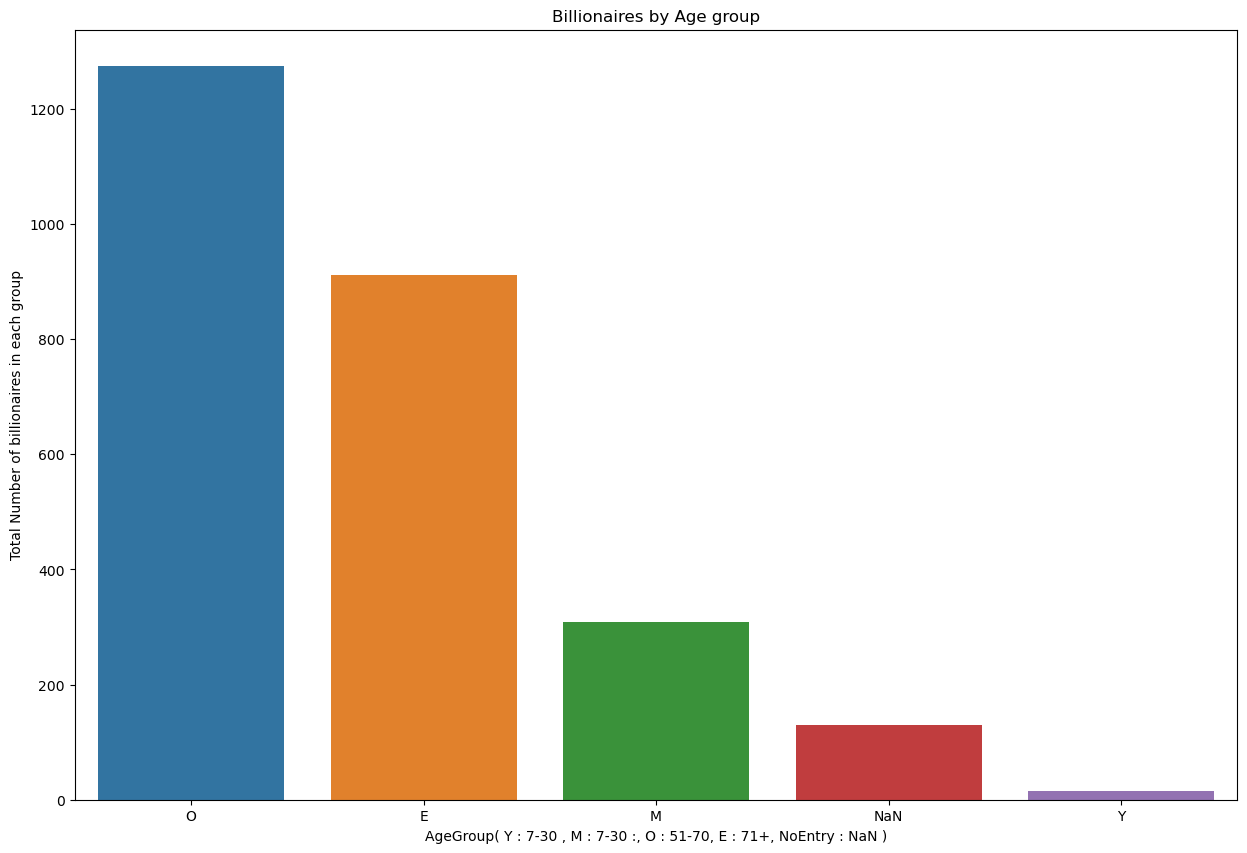

In [23]:
data['ageGroup'] = ''  # Create an empty column

for i in range(len(data)):
    if 17 <= data['age'].iloc[i] <= 30:
        data.loc[i, 'ageGroup'] = 'Y'
    elif 31 <= data['age'].iloc[i] <= 50:
        data.loc[i, 'ageGroup'] = 'M'
    elif 51 <= data['age'].iloc[i] < 70:
        data.loc[i, 'ageGroup'] = 'O'
    elif data['age'].iloc[i] >= 71:
        data.loc[i, 'ageGroup'] = 'E'
    else :
        data.loc[i, 'ageGroup'] = 'NaN'


data1 = data['ageGroup'].value_counts()
# Plotting bargraph

plt.figure(figsize=(15,10))
sns.barplot(x=data1.index,y=data1.values)
plt.xlabel('AgeGroup( Y : 7-30 , M : 7-30 :, O : 51-70, E : 71+, NoEntry : NaN )')
plt.ylabel('Total Number of billionaires in each group')
plt.title('Billionaires by Age group')

In [24]:
data['ageGroup'] = ''  # Create an empty column

for i in range(len(data)):
    if 17 <= data['age'].iloc[i] <= 30:
        data.loc[i, 'ageGroup'] = 'Y'
    elif 31 <= data['age'].iloc[i] <= 50:
        data.loc[i, 'ageGroup'] = 'M'
    elif 51 <= data['age'].iloc[i] < 70:
        data.loc[i, 'ageGroup'] = 'O'
    elif data['age'].iloc[i] >= 71:
        data.loc[i, 'ageGroup'] = 'E'
    else :
        data.loc[i, 'ageGroup'] = 'NaN'

data1 = data['ageGroup'].value_counts()
print(data1)

ageGroup
O      1274
E       912
M       309
NaN     130
Y        15
Name: count, dtype: int64


In [25]:
data_young = data.groupby('ageGroup').sum('selfMade')
data_young

,rank,finalWorth,age,selfMade,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
ageGroup,,,,,,,,,,,,,,,,,
E,1053878,5026.6,72319.0,592,1772071.0,5285.0,11787.0,104040.70,3957.2,58067.8,85554.3,64910.0,10541.4,34100.6,3.042926e+11,27034.736166,-7736.424540
M,450410,1180.5,13687.0,222,611241.0,1680.0,3396.0,36953.15,1180.6,20881.3,30595.9,23421.1,3814.9,13129.5,1.553891e+11,10955.488723,4421.396037
NaN,198814,390.7,4550.0,66,128880.0,396.0,846.0,14133.28,405.9,6544.8,11304.4,8466.7,1384.5,5051.6,6.112596e+10,3771.272658,4231.235503
O,1678186,5545.0,76798.0,929,2476076.0,7272.0,14828.0,157349.74,5145.2,78943.0,124359.8,94334.1,14861.2,55279.9,7.401338e+11,44139.826783,30252.694057
Y,22092,64.0,382.0,3,29950.0,85.0,167.0,1289.91,29.5,803.8,1114.7,894.0,224.1,500.3,2.326841e+09,519.968314,-13.007308


### 5. How many of these billionaires are self-made and how many have inherited it

In [21]:
inherit  = data[data['selfMade']==False].reset_index()
selfmade = data[data['selfMade']==True].reset_index()

x = inherit['selfMade'].value_counts()
print("Inherited Billionaires are "+ str(int(x.values)))
print("Self-Made Billionaires are "+ str(2640-int(x.values)))
print("\n")


total_billions = data['finalWorth'].sum()
inherited_billions = inherit.groupby('selfMade')['finalWorth'].sum().iloc[0]
selfmade_billions  = total_billions - inherited_billions
print('The ratio of money self-made to inherited is ' + str(selfmade_billions/inherited_billions))
print('sum of wealth of the selfmade billionaires is ' + str(selfmade_billions) +'B $ ')
print('sum of wealth of the inherited billionaires is ' + str(inherited_billions) +'B $ ')

Inherited Billionaires are 828
Self-Made Billionaires are 1812


The ratio of money self-made to inherited is 1.9660551573320373
sum of wealth of the selfmade billionaires is 8091.299999999999B $ 
sum of wealth of the inherited billionaires is 4115.5B $ 


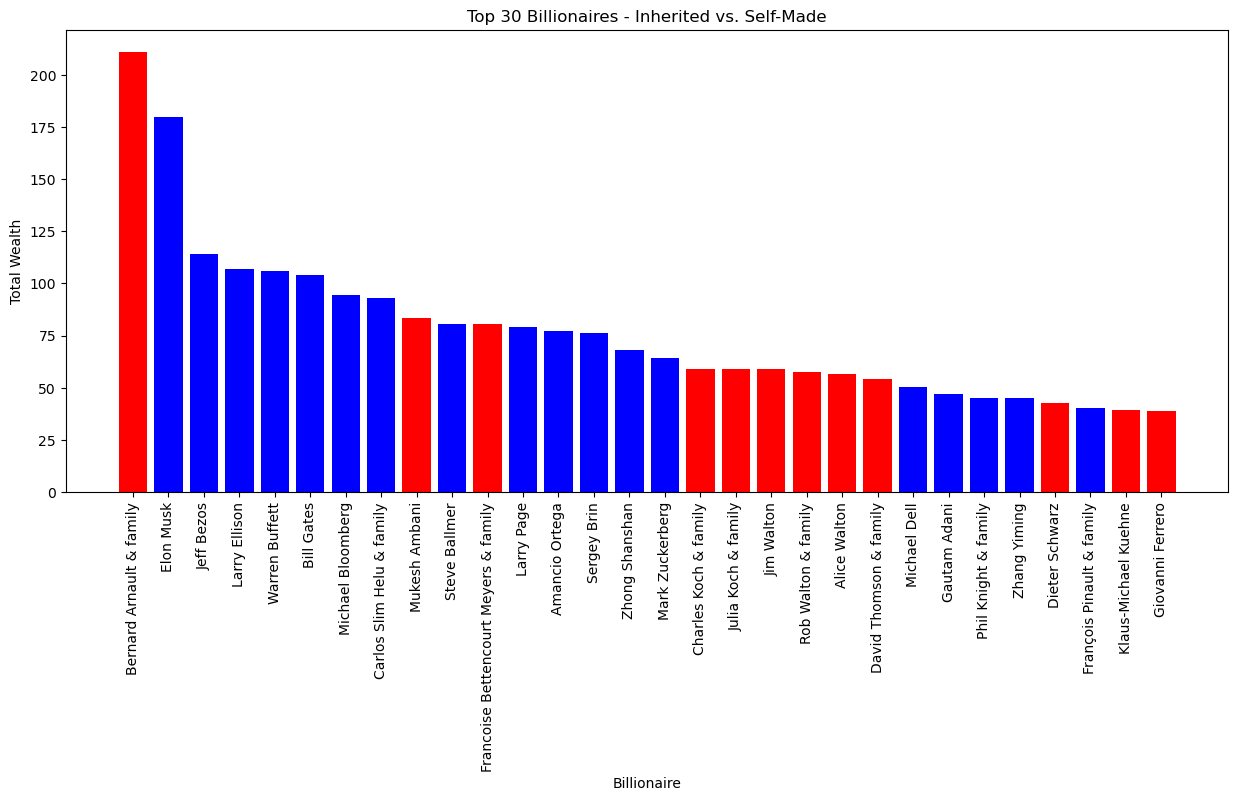

In [26]:
import matplotlib.pyplot as plt

# Assuming 'totalwealth' is the column representing total wealth
top_30 = data.head(30)

# Plotting the bar graph
plt.figure(figsize=(15, 6))

# Iterate through the rows
for index, row in top_30.iterrows():
    color = 'red' if row['selfMade'] == False else 'blue'
    
    # Bar graph for each billionaire
    plt.bar(row['personName'], row['finalWorth'], color=color, label='Inherited' if color == 'red' else 'Self-Made')

# Adding labels and title
plt.xlabel('Billionaire')
plt.ylabel('Total Wealth')
plt.title('Top 30 Billionaires - Inherited vs. Self-Made')
plt.xticks(rotation='vertical')

plt.show()

In [ ]:
# First Commit
# more analysis and plot(donut charts, pie chart etc coming in later commits)
# removal of unsused data['columns'], assigning of mean or appropriate values to NaN values
# analysis using different columns, heatmap and other stuff 